### MNIST 예제 (CNN모델 예제)

In [40]:
# 1. 필요한 라이브러리 임포트
import tensorflow as tf  # 딥러닝 라이브러리
from tensorflow.keras import layers, models  # 신경망 계층 및 모델 설계
from tensorflow.keras.datasets import mnist  # MNIST 데이터셋
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt  # 시각화 도구

In [41]:
# 2. 데이터 로드 및 전처리
# MNIST 데이터셋은 이미 나뉘어 제공 (학습/테스트 데이터)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [42]:
# MNIST 이미지는 28x28 크기, 채널 정보 추가 (흑백 이미지는 채널 1개)
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255.0  # 0~1로 정규화
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255.0

In [43]:
# 레이블을 One-Hot Encoding (숫자 0~9를 벡터로 변환)
# One-Hot Encoding : 범주형 데이터를 수치형 데이터로 변환하는 방법
if len(y_train.shape) == 1:  # shape이 (n,)인지 확인
    y_train = tf.keras.utils.to_categorical(y_train, 10) # to_categorical > 범주화 시켜주는 메서드
if len(y_test.shape) == 1:  # shape이 (n,)인지 확인
    y_test = tf.keras.utils.to_categorical(y_test, 10)

In [44]:
# 3. CNN 모델 정의
model = models.Sequential()  # 순차적 모델 선언

In [45]:
# 첫 번째 합성곱 계층: 필터 크기 3x3, 필터 수 32, 활성화 함수 ReLU
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1))) # ReLU는 이미지 처리에 많이 사용
# 풀링 계층: 2x2 크기로 다운샘플링
model.add(layers.MaxPooling2D((2, 2)))

/Users/jojungon/AI_Project/.venv/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
# 두 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

In [47]:
# 세 번째 합성곱 계층: 필터 수 64
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

In [48]:
# Fully Connected Layer를 연결하기 위해 Flatten 처리
model.add(layers.Flatten())

In [49]:
# Fully Connected Layer 1: 뉴런 수 64, 활성화 함수 ReLU
model.add(layers.Dense(64, activation='relu'))

In [50]:
# 출력층: 뉴런 수 10(클래스 수), 활성화 함수 Softmax
model.add(layers.Dense(10, activation='softmax'))

In [51]:
# 모델 요약 출력 (구조 확인용)
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [52]:
# 4. 모델 컴파일
model.compile(optimizer='adam',               # 최적화 알고리즘
              loss='categorical_crossentropy', # 다중 클래스 분류 손실 함수
              metrics=['accuracy'])           # 평가 지표: 정확도

In [54]:
# 5. 모델 학습
history = model.fit(x_train, y_train, epochs=50, batch_size=64, validation_split=0.2)

Epoch 1/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 5s 7ms/step - accuracy: 0.8493 - loss: 0.4901 - val_accuracy: 0.9760 - val_loss: 0.0781
Epoch 2/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9800 - loss: 0.0624 - val_accuracy: 0.9838 - val_loss: 0.0563
Epoch 3/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9857 - loss: 0.0427 - val_accuracy: 0.9825 - val_loss: 0.0594
Epoch 4/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9902 - loss: 0.0319 - val_accuracy: 0.9877 - val_loss: 0.0408
Epoch 5/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9927 - loss: 0.0218 - val_accuracy: 0.9884 - val_loss: 0.0401
Epoch 6/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 7s 9ms/step - accuracy: 0.9929 - loss: 0.0211 - val_accuracy: 0.9890 - val_loss: 0.0407
Epoch 7/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 9ms/step - accuracy: 0.9955 - loss: 0.0145 - val_accuracy: 0.9895 - val_loss: 0.0374
Epoch 8/50
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step - accuracy: 0.9955 - loss: 0.0126 - val_accuracy: 0.

In [55]:
# 6. 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"테스트 정확도: {test_acc:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9929 - loss: 0.0602
테스트 정확도: 0.9940


In [56]:
# 7. 결과 확인: 테스트 데이터에서 임의의 이미지 예측
import numpy as np

In [57]:
# 테스트 데이터에서 첫 번째 샘플을 가져옴
sample_image = x_test[0]   # 첫번 째 이미지 저장
sample_label = np.argmax(y_test[0])   # y_test[0] 배열에서 가장 큰 값을 가지는 요소의 인덱스를 찾아 sample_label 변수에 저장합니다.

In [58]:
# 모델로 예측 수행
predicted_label = np.argmax(model.predict(sample_image.reshape(1, 28, 28, 1))) # ("이미지 개수", "Pixel Height", "Pixel Width", "흑백이미지 = 1, RGB = 3")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


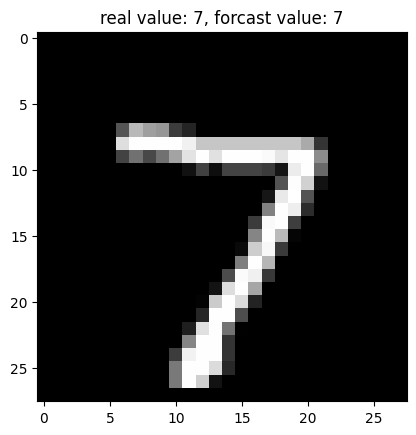

In [59]:
# 결과 출력
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"real value: {sample_label}, forcast value: {predicted_label}")
plt.show()